In [0]:
!pip install --quiet lucid==0.0.5


**This tutorial quickly introduces Lucid, a network for visualizing neural networks. Lucid is a kind of spiritual successor to DeepDream, but provides flexible abstractions so that it can be used for a wide range of interpretability research.**

Ref: https://colab.research.google.com/github/tensorflow/lucid/blob/master/notebooks/tutorial.ipynb#scrollTo=YyexdOXIcH2i

In [0]:
# Imports

import numpy as np
import tensorflow as tf

import lucid.modelzoo.vision_models as models
from lucid.misc.io import show
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform

In [0]:
model = models.InceptionV1()

The foundation of computation in TensorFlow is the Graph object. This holds a network of nodes, each representing one operation, connected to each other as inputs and outputs. After you've created a Graph object, you can save it out by calling as_graph_def(), which returns a GraphDef object.

The GraphDef class is an object created by the ProtoBuf library from the definition in tensorflow/core/framework/graph.proto. The protobuf tools parse this text file, and generate the code to load, store, and manipulate graph definitions. If you see a standalone TensorFlow file representing a model, it's likely to contain a serialized version of one of these GraphDef objects saved out by the protobuf code.

This generated code is used to save and load the GraphDef files from disk. 

In [0]:
model.load_graphdef()

In [5]:
model.labels[0:5]

['dummy', 'kit fox', 'English setter', 'Siberian husky', 'Australian terrier']

## Visualize a Neuron

512 980.8873



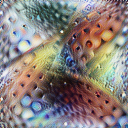

In [6]:
_ = render.render_vis(model,"mixed4a_pre_relu:478")

## Getting a bit deeper

Lucid splits visualizations into a few components which you can fiddle with completely indpendently:

* **objectives** -- What do you want the model to visualize?
* **parameterization** -- How do you describe the image?
* **transforms** -- What transformations do you want your visualization to be robust to?

In this section, we'll experiment with each one.

512 1662.1882



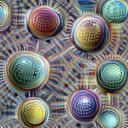

In [7]:
# Let's visualize another neuron using a more explicit objective:
obj = objectives.channel("mixed4a_pre_relu", 465)
_ = render.render_vis(model, obj)

In [0]:
# for tensor in tf.get_default_graph().as_graph_def().node:
#     print(tensor.name)

512 418.43338



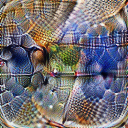

In [14]:
channel = lambda n: objectives.channel("mixed4e_pre_relu", n)
obj = channel(467) + channel(477)
_=render.render_vis(model,obj)

512 2510.3867



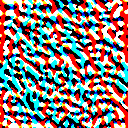

In [15]:
channel = lambda n: objectives.channel("conv2d0", n)
obj = channel(4) + channel(5)
_=render.render_vis(model,obj)

Transformation Robustness
Recomended reading: The Feature Visualization article's section titled The Enemy of Feature Visualization discusion of "Transformation Robustness." In particular, there's an interactive diagram that allows you to easily explore how different kinds of transformation robustness effects visualizations.

512 2339.708



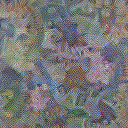

In [36]:
# No transformation
transforms = []
_ = render.render_vis(model,"mixed4a_pre_relu:476",transforms=transforms)

512 1350.9816



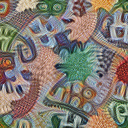

In [39]:
# Breaking out all the stops

transforms = [
    transform.pad(16),
    transform.jitter(8),
    transform.random_scale([n/100. for n in range(80, 120)]),
    #transform.random_rotate(range(-10,10) + range(-5,5) + 10*range(-2,2)),
    transform.jitter(2)
]
_ = render.render_vis(model, "mixed4a_pre_relu:476", transforms=transforms)

Experimenting with parameterization
Recomended reading: The Feature Visualization article's section on Preconditioning and Parameterization

In [0]:
# Using alternate parameterizations is one of the primary ingredients for
# effective visualization

param_f = lambda: param.image(128, fft=True, decorrelate=True)
_ = render.render_vis(model, "mixed4a_pre_relu:2", param_f)